# Week 2 Solutions

In [1]:
#%matplotlib widget
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import rebound
import time
import numpy as np

In [2]:
def simulate(sim, Norbits, Noutputs = 1000):
    # runs the simulation and makes some plots of the output
    times = np.linspace(0, Norbits*2*np.pi, Noutputs)
    n = sim.orbits()[0].n
    x1 = np.zeros(Noutputs)
    y1 = np.zeros(Noutputs)
    x2 = np.zeros(Noutputs)
    y2 = np.zeros(Noutputs)
    x3 = np.zeros(Noutputs)
    y3 = np.zeros(Noutputs)
    vx3 = np.zeros(Noutputs)
    vy3 = np.zeros(Noutputs)
    a = np.zeros(Noutputs)
    e = np.zeros(Noutputs)
    theta = np.zeros(Noutputs)
    theta2 = np.zeros(Noutputs)
    r1 = np.zeros(Noutputs)
    r2 = np.zeros(Noutputs)
    for i,t in enumerate(times):
        sim.integrate(t, exact_finish_time=1)
        x1[i] = sim.particles[0].x
        y1[i] = sim.particles[0].y
        x2[i] = sim.particles[1].x
        y2[i] = sim.particles[1].y
        x3[i] = sim.particles[2].x
        y3[i] = sim.particles[2].y
        vx3[i] = sim.particles[2].vx
        vy3[i] = sim.particles[2].vy
        a[i] = sim.orbits()[1].a
        e[i] = sim.orbits()[1].e
        theta2[i] = sim.particles[1].l
        theta[i] = sim.particles[2].l
        r1[i] = np.sqrt((x3[i]-x1[i])**2+(y3[i]-y1[i])**2)
        r2[i] = np.sqrt((x3[i]-x2[i])**2+(y3[i]-y2[i])**2)

    # compute Jacobi constant (eq. 3.36)
    m1 = sim.particles[0].m
    m2 = sim.particles[1].m
    CJ = 2*(m1/r1 + m2/r2) + 2*n*(x3*vy3-y3*vx3) -vx3**2-vy3**2
    
    # go into the rotating frame
    def rotated(x,y,M):
        xn = x*np.cos(M) + y*np.sin(M)
        yn = -x*np.sin(M) + y*np.cos(M)
        return xn, yn
    x1, y1 = rotated(x1, y1, theta2)
    x2, y2 = rotated(x2, y2, theta2)
    x3, y3 = rotated(x3, y3, theta2)

    # plots:
    # trajectory (Fig 3.16, Fig 3.17)
    fig = plt.figure()
    #plt.plot(x1, y1)
    plt.plot(x2, y2, 'r')
    op, = plt.plot(x3, y3, lw=1) # trajectory of test particle
    plt.plot(x1[-1], y1[-1], 'ro')  # m1 location
    plt.plot(x2[-1], y2[-1], 'ro')  # m2 location
    lim = 1.2
    plt.ylim((-lim,lim))
    plt.xlim((-lim,lim))

    # a and e as function of time (Fig. 3.19)
    plt.figure()
    plt.plot(times, a-1, label='a-1')
    plt.plot(times, e, label='e')
    plt.legend()
    plt.xlabel('t')

    # Jacobi constant/Tisserand approx against time
    plt.figure()
    CT = 0.5/a + (a*(1-e*e))**0.5   # Tisserand eq. (3.46)
    plt.plot(times, CT-1.5, label='Tisserand-3/2')
    plt.plot(times, CJ-3, label='Jacobi-3')
    plt.legend()
    plt.xlabel('t')

    # a vs theta (Fig. 3.18)
    plt.figure()
    #theta = np.degrees(np.mod(np.arctan2(y3,x3),2*np.pi))
    plt.plot(np.degrees(np.mod(theta-theta2, 2*np.pi)),a)
    plt.plot(60, 1, marker='o', mfc='none', mec='black')
    plt.annotate(r"$L_4$", (60,1), xytext=(0,-5), textcoords="offset points", ha="center", va="top")
    plt.plot(180, 1, marker='o', mfc='none', mec='black')
    plt.annotate(r"$L_3$", (180,1), xytext=(0,-5), textcoords="offset points", ha="center", va="top")
    plt.plot(300, 1, marker='o', mfc='none', mec='black')
    plt.annotate(r"$L_5$", (300,1), xytext=(0,-5), textcoords="offset points", ha="center", va="top")
    plt.xlim((0,360))
    plt.xlabel(r'$\theta$ (deg)')
    plt.ylabel(r'$a$')


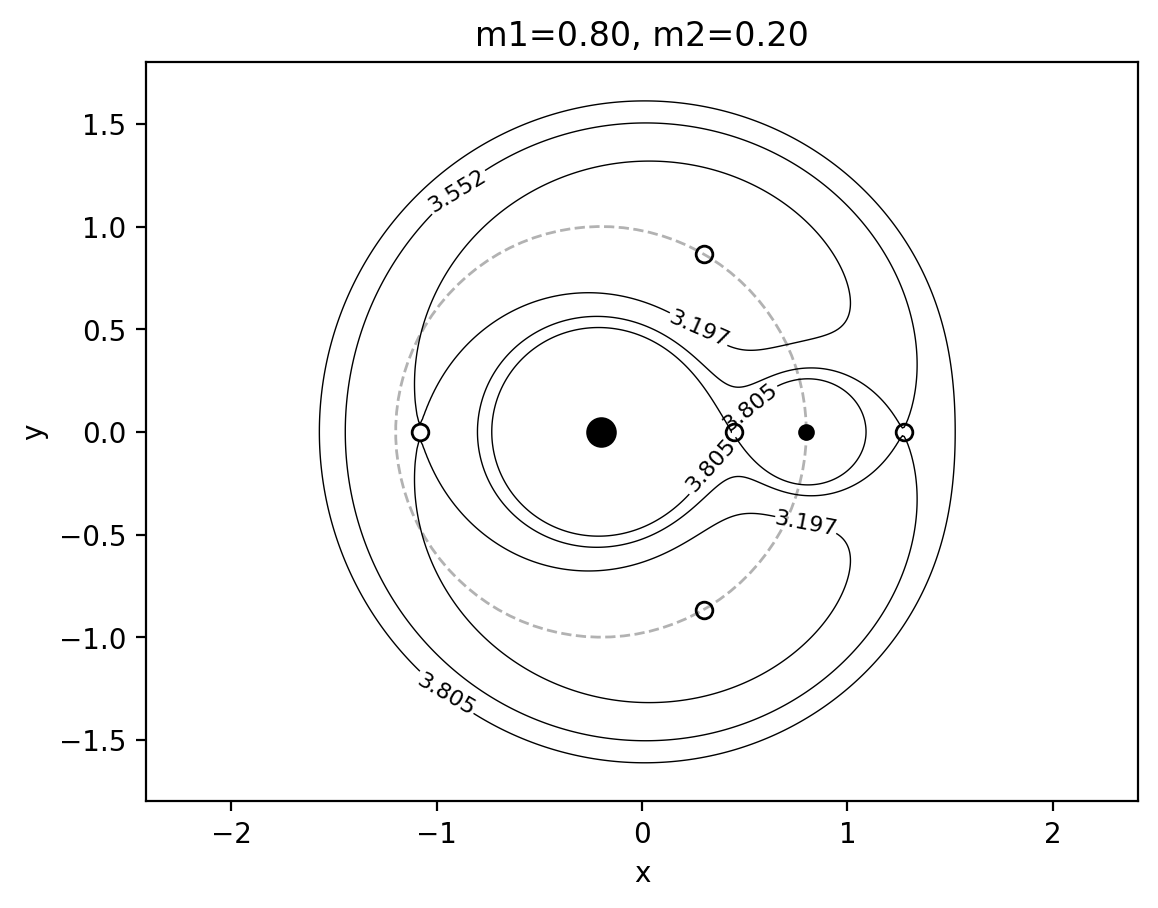

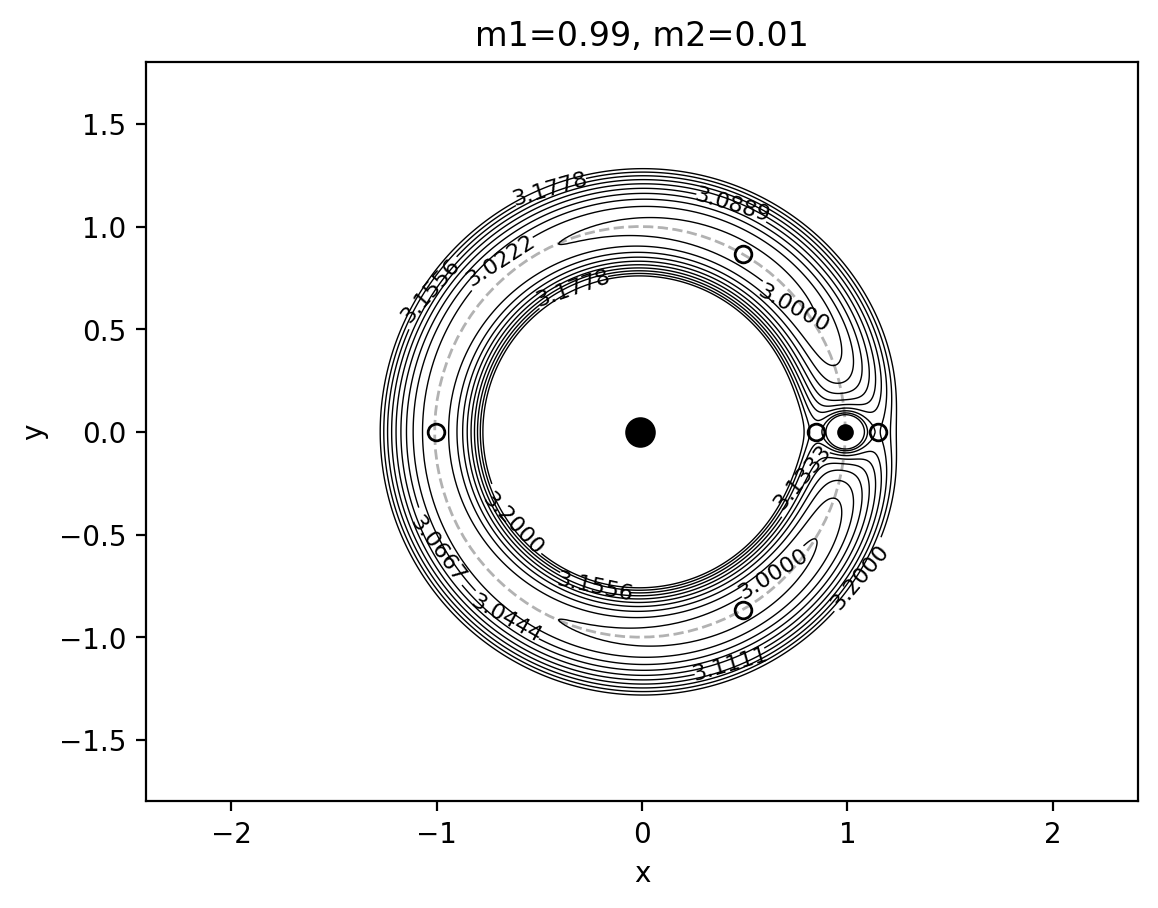

In [3]:
def zerov_contours(m2,levels):
    m1 = 1-m2
    x = np.linspace(-1.8, 1.8, 400)
    y = np.linspace(-1.8, 1.8, 400)
    X, Y = np.meshgrid(x, y)

    r1 = np.sqrt((X + m2)**2 + Y**2)
    r2 = np.sqrt((X - m1)**2 + Y**2)

    CJ = X**2 + Y**2 + 2*(m1/r1 + m2/r2)

    cs = plt.contour(X, Y, CJ, levels=levels, colors='black', linewidths=0.5)
    plt.clabel(cs, inline=True, fontsize=8)

    plt.plot(-m2,0,'ko',ms=10)
    plt.plot(m1,0,'ko',ms=5)
    plt.plot(0.5-m2, 3**0.5/2, marker='o', mfc='none', mec='black')
    plt.plot(0.5-m2, -3**0.5/2, marker='o', mfc='none', mec='black')

    a = (m2/(3*m1))**(1/3)
    r2L1 = a - a**2/3 - a**3/9 - 23*a**4/81  # eqs. (3.83) and (3.72)
    plt.plot(m1-r2L1, 0, marker='o', mfc='none', mec='black')
    r2L2 = a + a**2/3 - a**3/9 - 31*a**4/81  # eqs. (3.84) and (3.88)
    plt.plot(r2L2+m1, 0, marker='o', mfc='none', mec='black')
    b = -(7/12)*(m2/m1) + (7/12)*(m2/m1)**2 - (13223/20736)*(m2/m1)**3
    r2L3 = 2 + b # eqs. (3.89) and (3.93)
    plt.plot(m1-r2L3, 0, marker='o', mfc='none', mec='black')

    # add unit circle
    theta = np.linspace(0,2*np.pi,100)
    plt.plot(np.cos(theta)-m2, np.sin(theta), 'k--', lw=1, alpha=0.3)

# Fig. 3.7
zerov_contours(0.2,(3.197, 3.552, 3.805))
plt.title('m1=%.2f, m2=%.2f' % (0.8,0.2))
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

# Fig. 3.9
zerov_contours(0.01, np.linspace(3,3.2,10))
plt.title('m1=%.2f, m2=%.2f' % (0.99,0.01))
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

#### Tadpole from Fig 3.16

P,n,a,e =  6.283185307179586 1.0 1.0 0.0


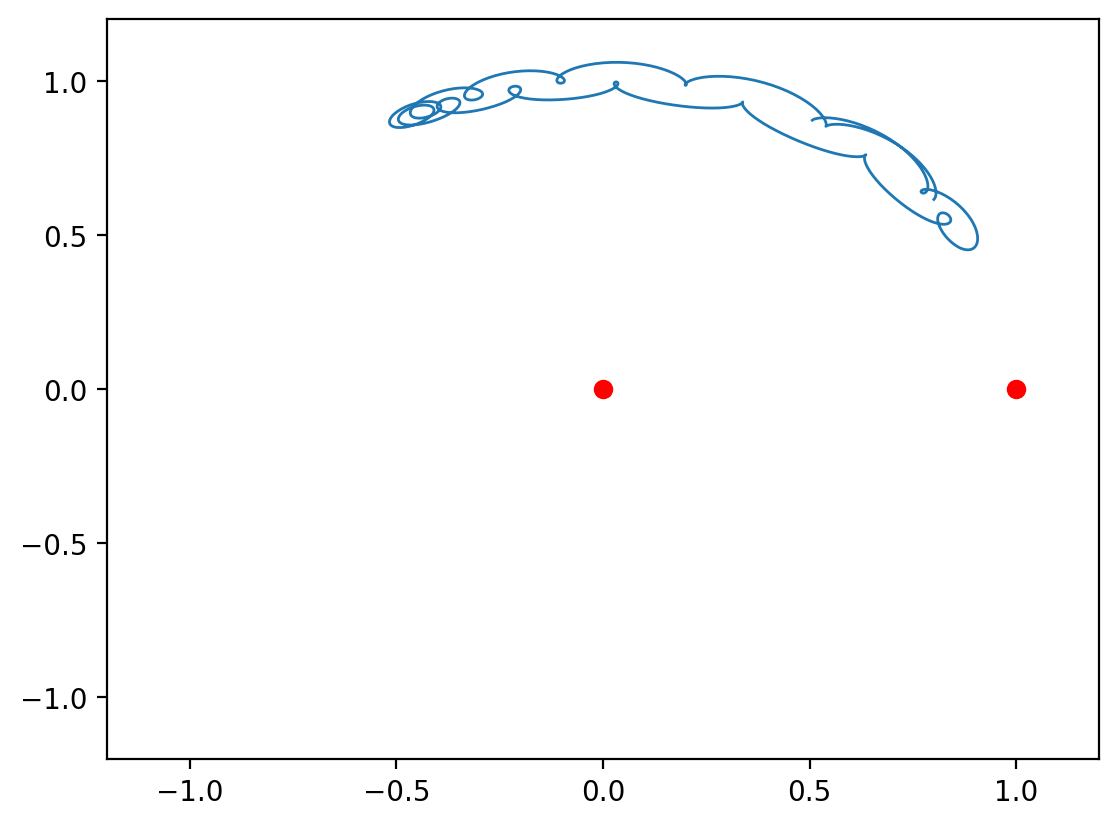

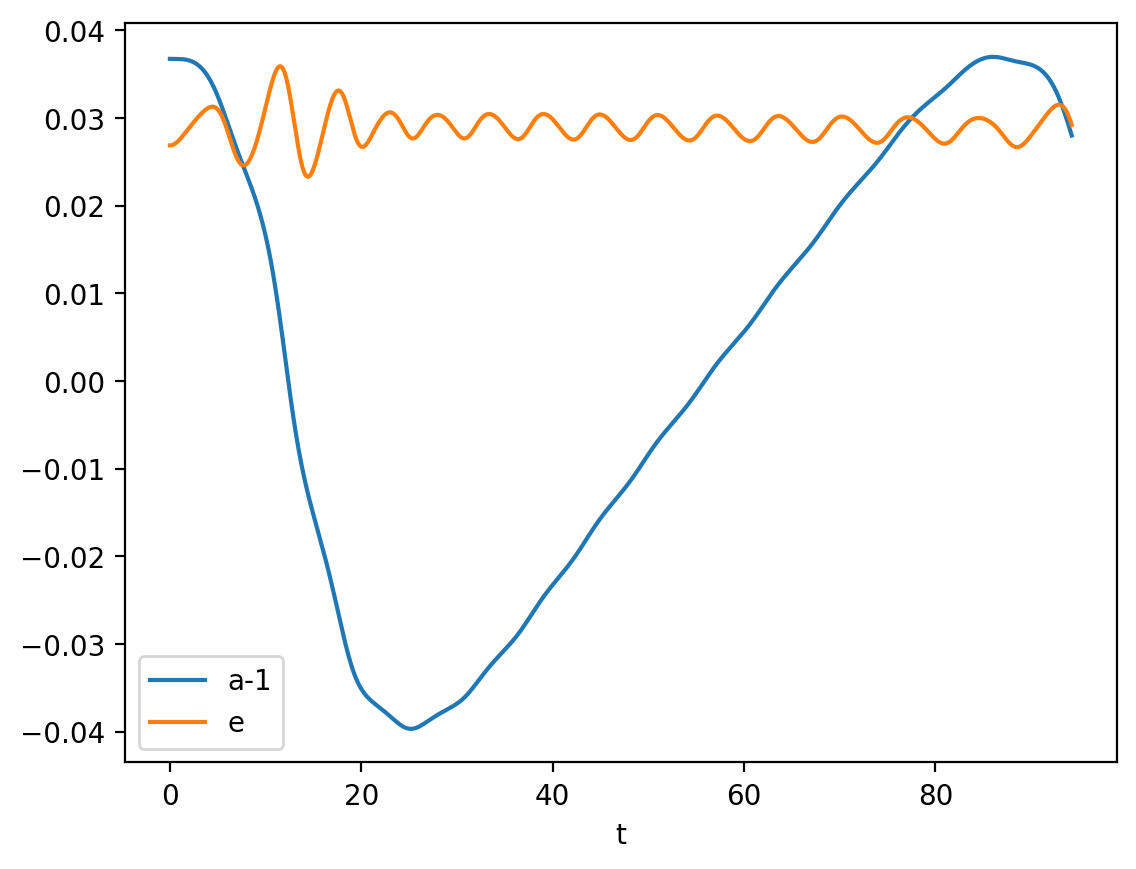

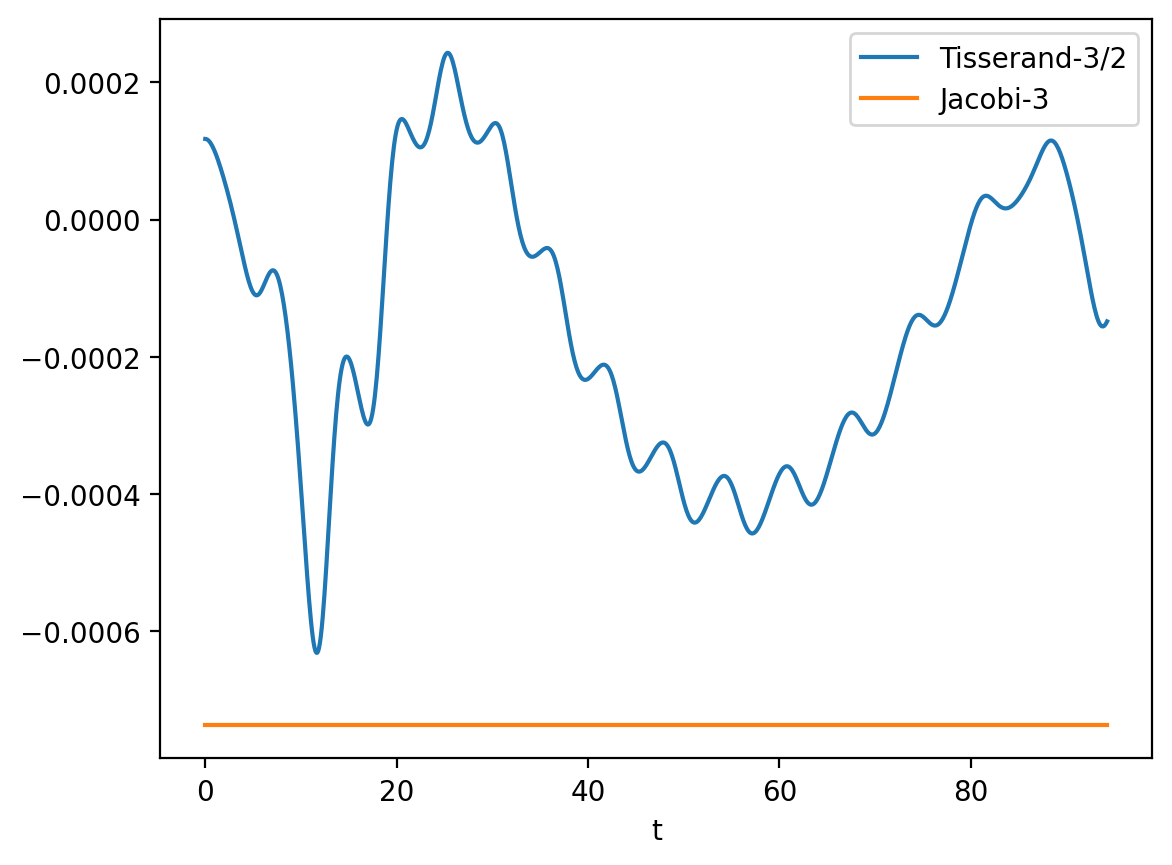

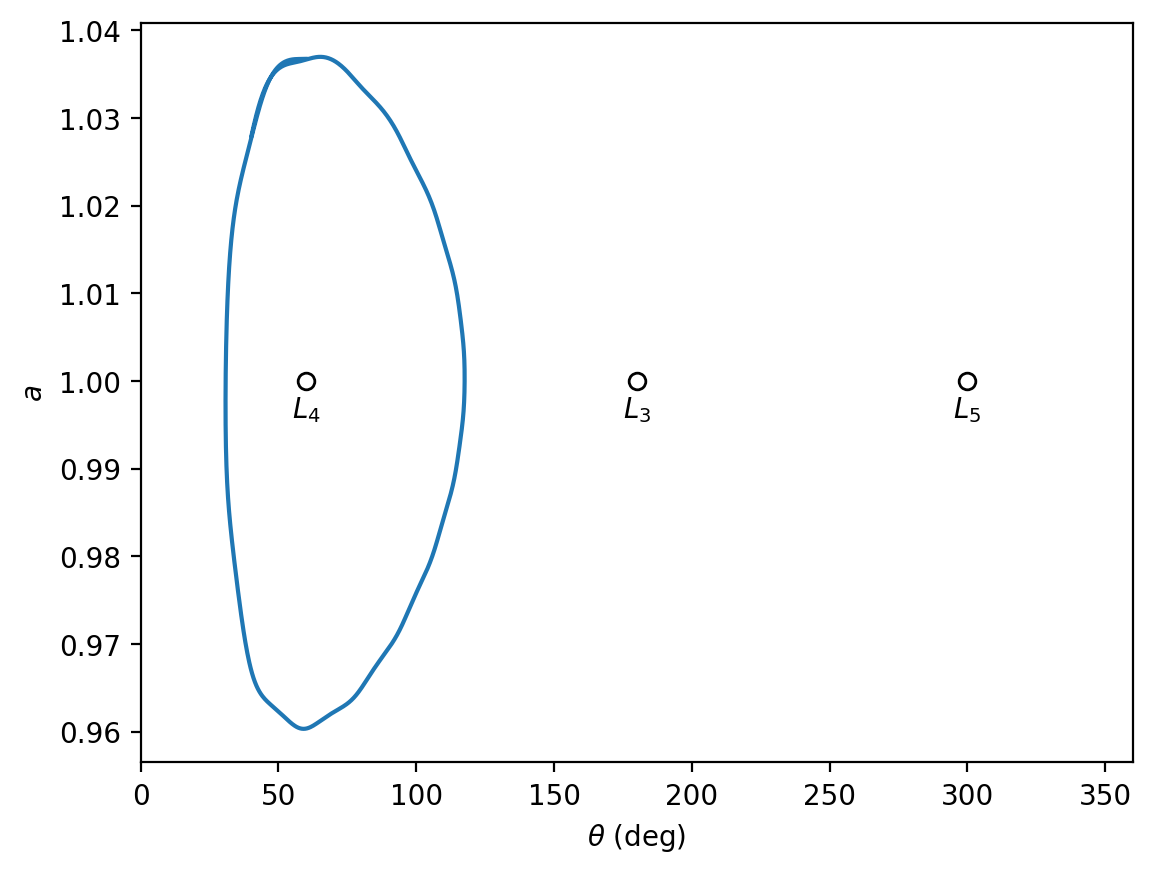

In [23]:
plt.close('all')

# Set up circular orbit first
m2 = 0.001
sim = rebound.Simulation()
sim.add(m=1-m2)
sim.add(m=m2, a=1, e=0)
sim.move_to_com()

# check the orbital parameters (should be p_orb=2pi,n=1,a=1,e=0)
p_orb = sim.orbits()[0].P
n = 2*np.pi/p_orb
a = sim.orbits()[0].a
e = sim.orbits()[0].e
print("P,n,a,e = ", p_orb,n,a,e)

# now add the test particle
# tadpole from Fig 3.16
x0, y0 = (0.5, 3**0.5/2)  # L4 location
x,y,xv,vy = (x0 + 0.0065, y0 + 0.0065, 0, 0)
r = (x**2+y**2)**0.5
sim.add(m=0, x=x, y=y, vx=-n*y, vy=n*x)
simulate(sim, 15)

#### First horseshoe example from Fig 3.17

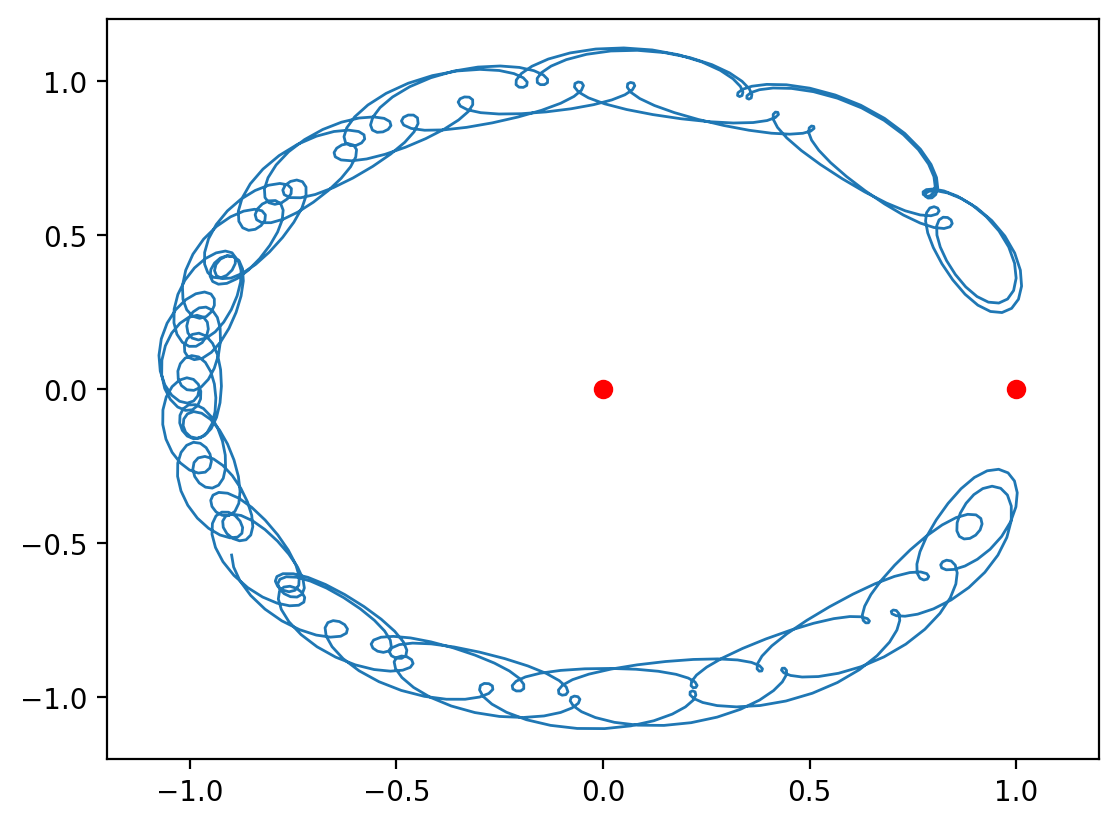

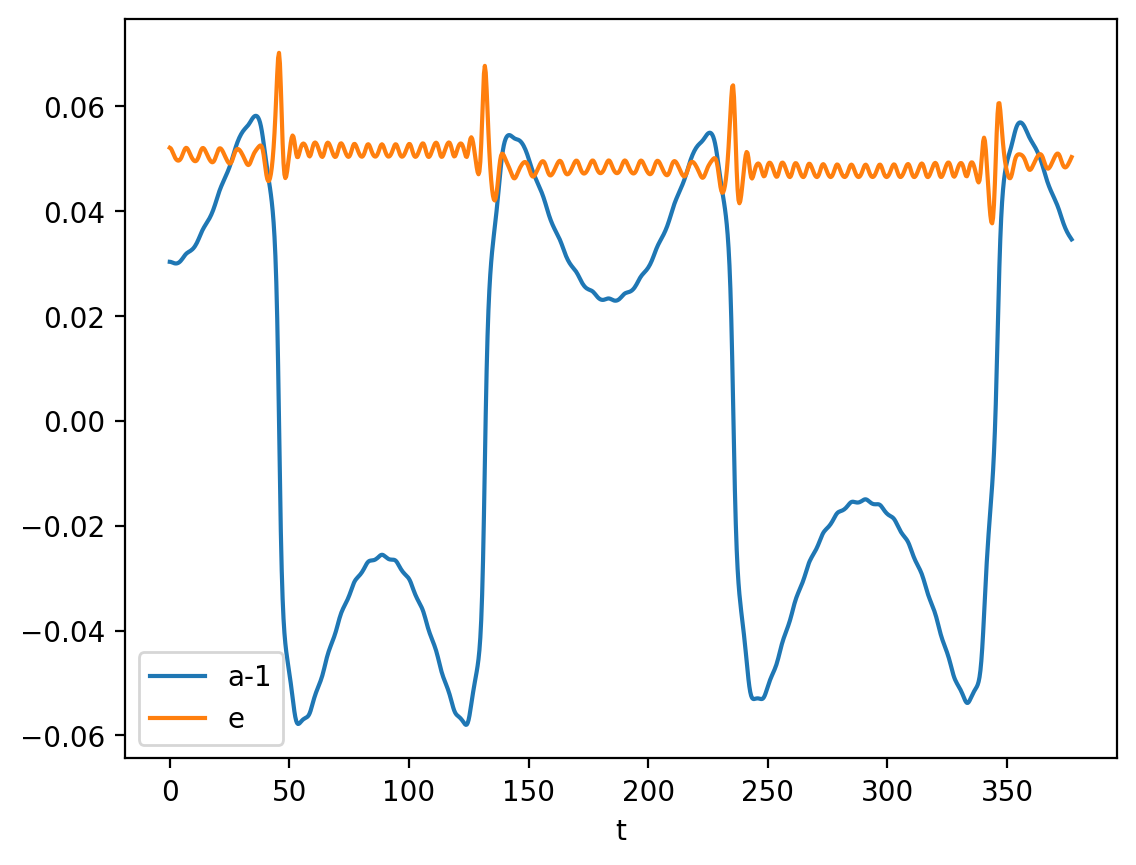

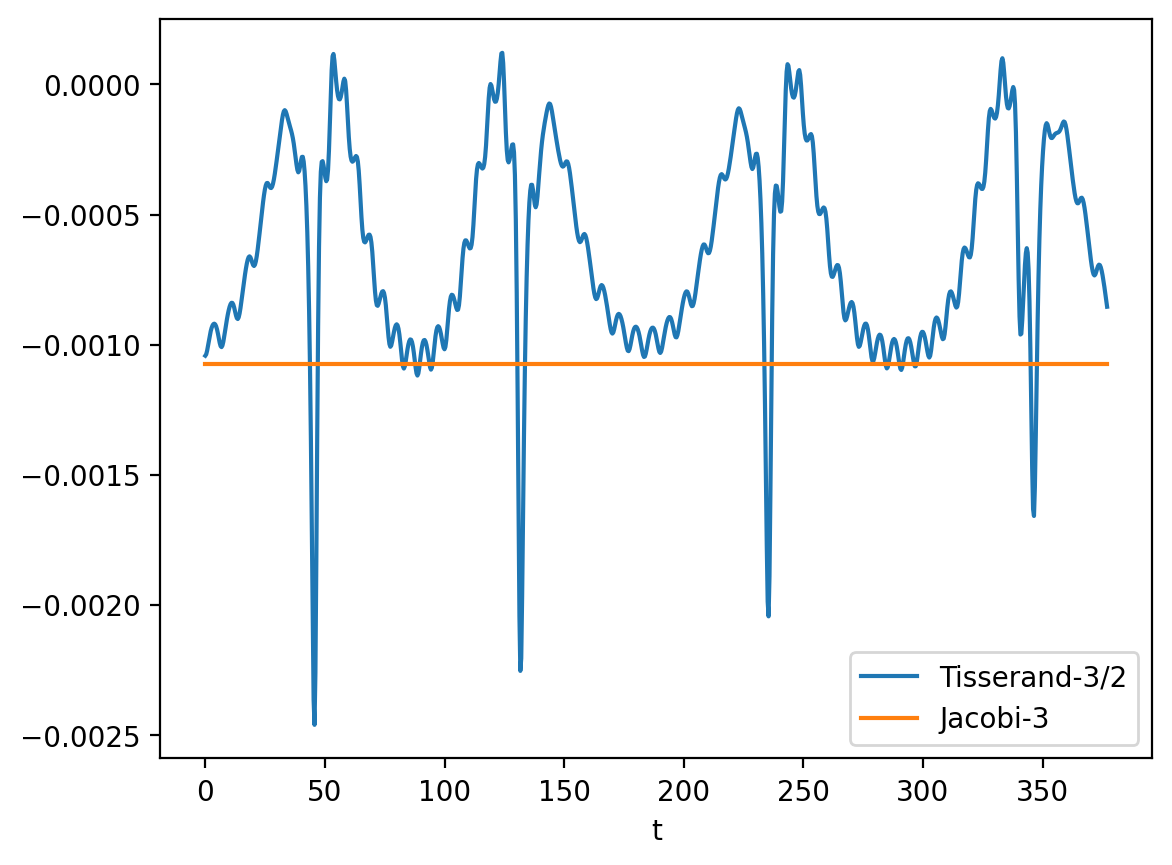

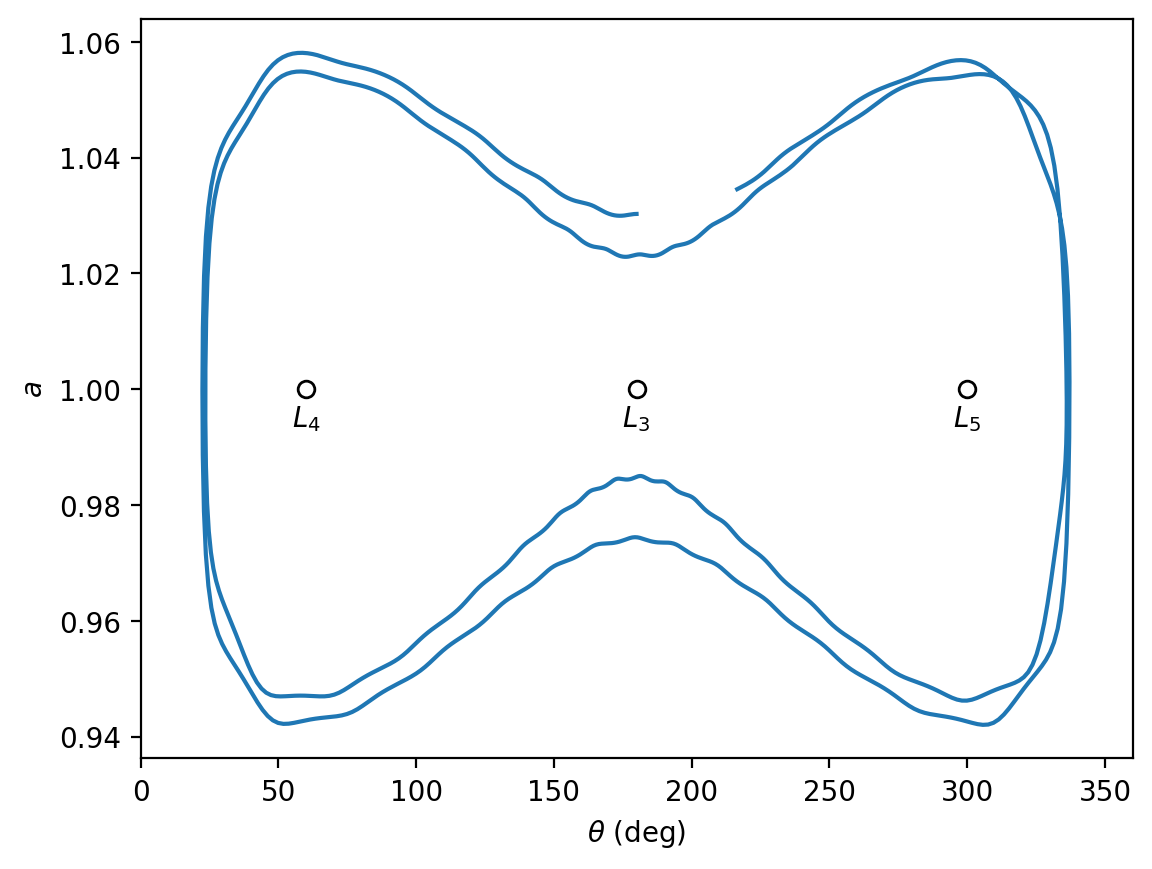

In [25]:
plt.close('all')

# Set up circular orbit first
m2 = 0.000953875
sim = rebound.Simulation()
sim.add(m=1-m2)
sim.add(m=m2, a=1, e=0)
sim.move_to_com()

# horseshoe
# first example from Fig 3.17
x,y,xv,vy = (-0.97668, 0, 0, -0.06118)
#x,y,xv,vy = (-1.02745, 0, 0, 0.04032)
r = (x**2+y**2)**0.5
sim.add(m=0, x=x, y=y, vx=-n*y, vy=n*x + vy)

simulate(sim, 60)

#### Second horseshoe example from Fig 3.17

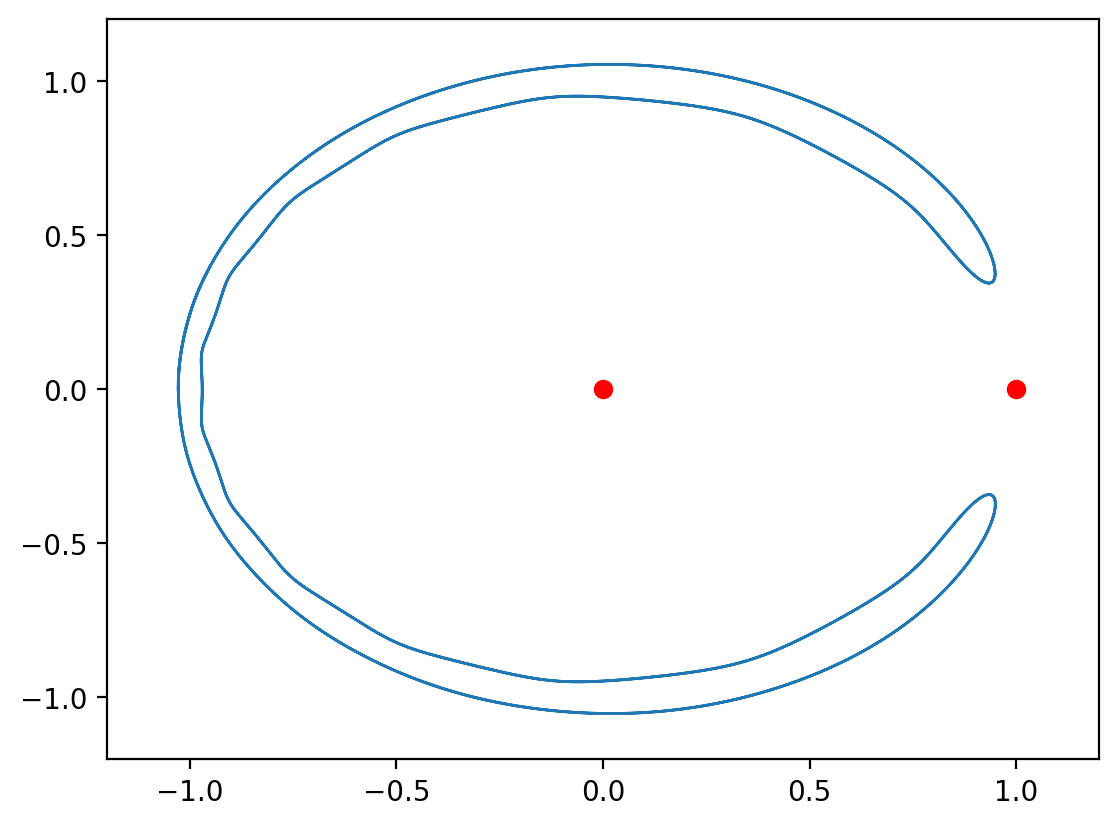

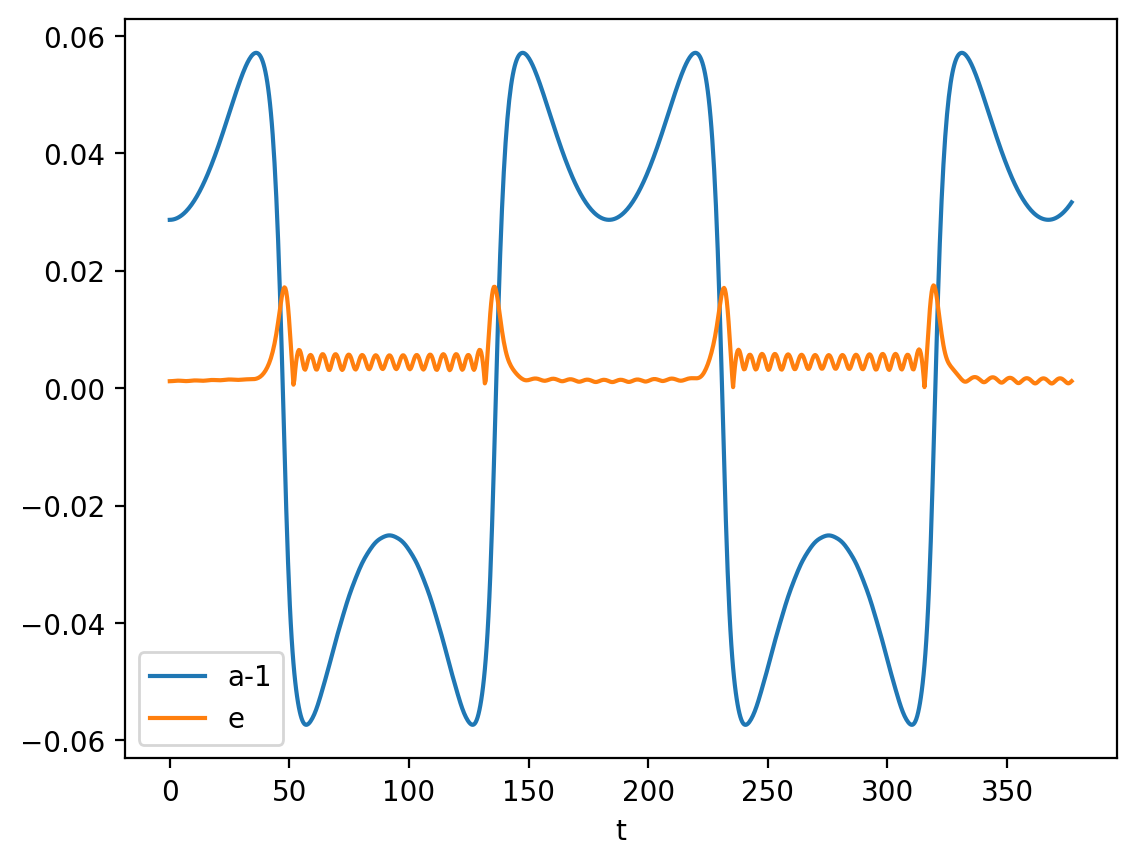

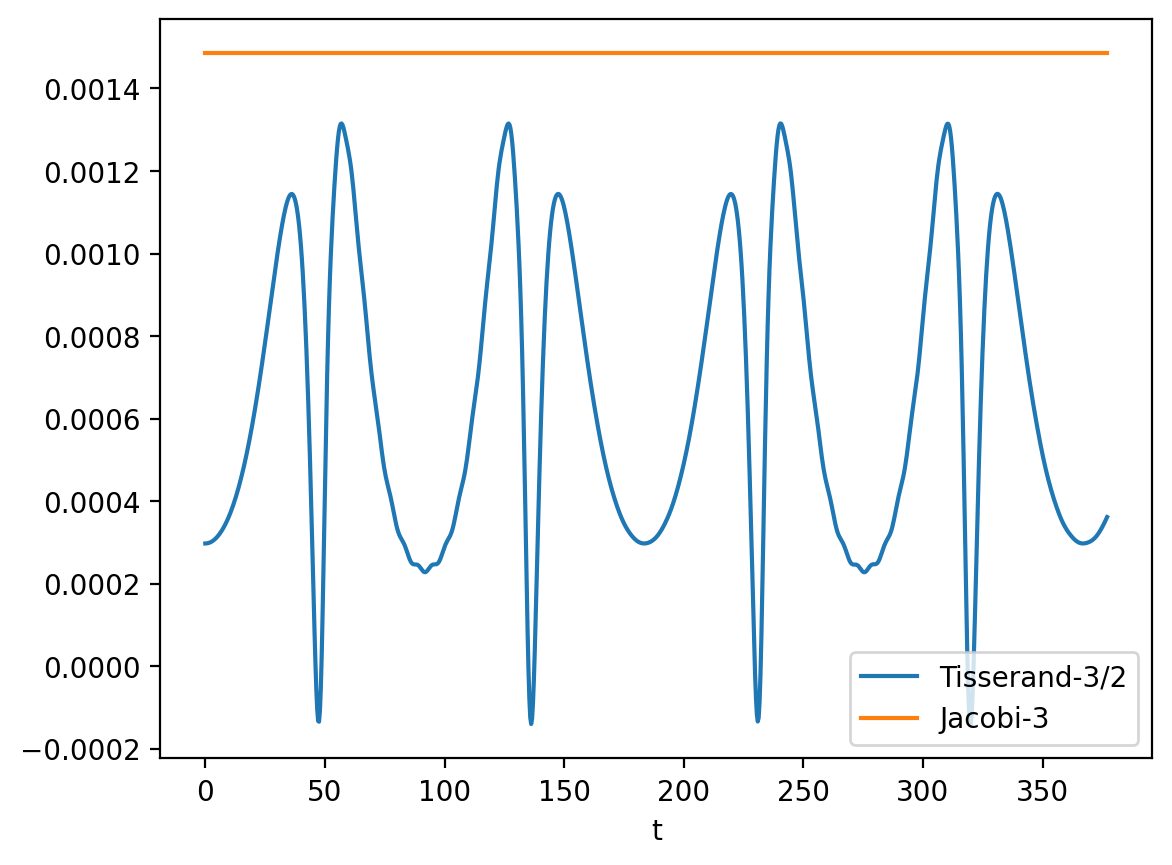

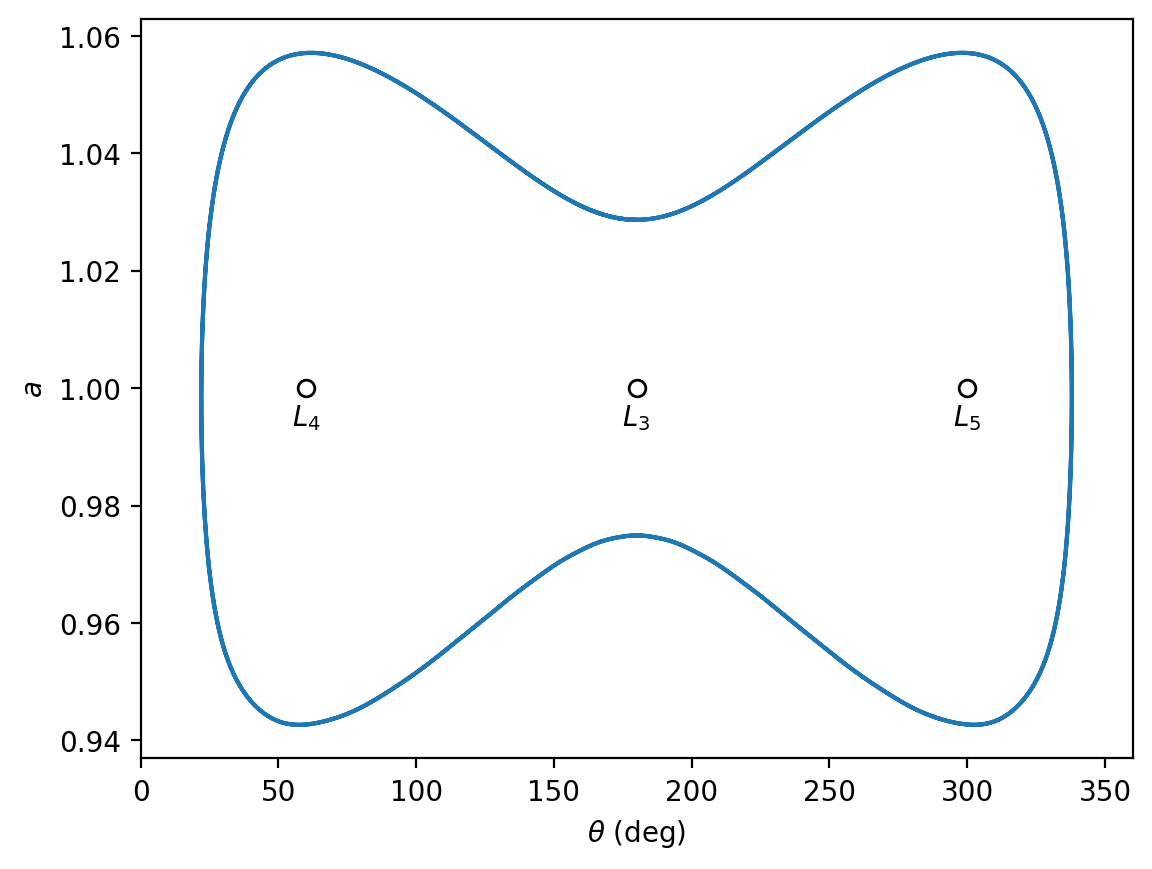

In [26]:
plt.close('all')

# Set up circular orbit first
m2 = 0.000953875
sim = rebound.Simulation()
sim.add(m=1-m2)
sim.add(m=m2, a=1, e=0)
sim.move_to_com()

# horseshoe
# second example from Fig 3.17
x,y,xv,vy = (-1.02745, 0, 0, 0.04032)
r = (x**2+y**2)**0.5
sim.add(m=0, x=x, y=y, vx=-n*y, vy=n*x + vy)

simulate(sim, 60)